## Import

In [2]:
import cv2
import pathlib
import numpy as np
import os.path as osp
import matplotlib.pyplot as plt
# from skimage.metrics import structural_similarity

In [3]:
%matplotlib inline

## Capture Background

In [4]:
fps = 60
cur_path = str(pathlib.Path().resolve())
images_save_path = cur_path + r'\\Playground'

In [5]:
# cap = cv2.VideoCapture(0)
# fnum = 1
# # Check if the webcam is opened correctly
# if not cap.isOpened():
#     raise IOError("Cannot open webcam")

# ret, frame = cap.read()
# frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
# cv2.imshow('Input', frame)

# cv2.imwrite(osp.join(images_save_path, f"background.png"), frame)

# cap.release()
# cv2.destroyAllWindows()

## Subtract

In [6]:
background = cv2.imread(images_save_path + r'\\background.png', 1)  # the 1 flag indicates color image 
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
plt.imshow(background, cmap='gray')

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


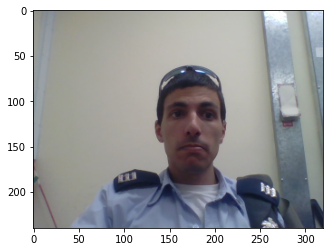

In [6]:
sample_img = cv2.imread(images_save_path + r'\\1.png', 1)  # the 1 flag indicates color image
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
plt.imshow(sample_img, cmap='gray')

In [7]:
subt = sample_img - background

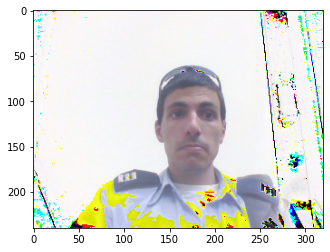

In [8]:
plt.imshow(subt, cmap='gray')

In [68]:
subt2 = cv2.absdiff(sample_img, background)

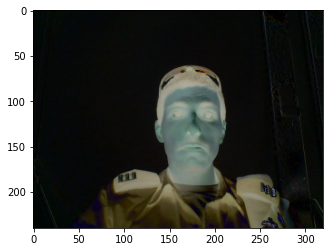

In [69]:
plt.imshow(subt2)

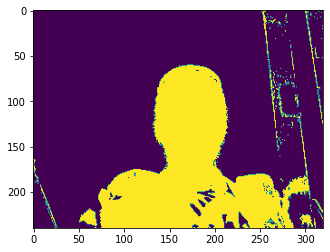

In [73]:
subt2_gs = cv2.cvtColor(subt2, cv2.cv2.COLOR_RGB2GRAY)
mask_diff = cv2.threshold(subt2_gs,15,255,cv2.THRESH_BINARY)
mask_diff = mask_diff[1] 
plt.imshow(mask_diff)

### Erosen + Dilation

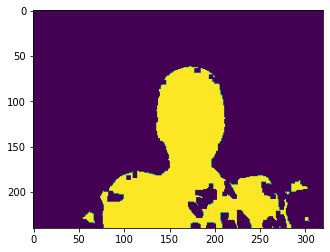

In [80]:
# Creating kernel
kernel = np.ones((3, 3), np.uint8)
  
# Using cv2.erode() method 
er_image = cv2.erode(mask_diff, kernel, iterations=2) 
  
# Displaying the image 
# cv2.imshow(window_name, image) 
plt.imshow(er_image)

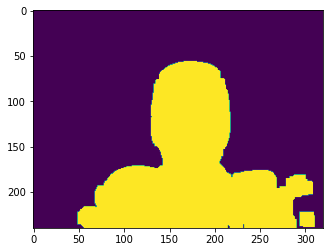

In [83]:
# Creating kernel
kernel = np.ones((5, 5), np.uint8)
  
# Using cv2.erode() method 
dil_image = cv2.dilate(er_image, kernel, iterations=3) 
  
# Displaying the image 
# cv2.imshow(window_name, image) 
plt.imshow(dil_image)

### result

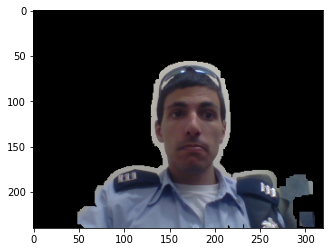

In [84]:
res = cv2.bitwise_and(sample_img,sample_img,mask = dil_image)
plt.imshow(res)

## ScikitLearn approach

In [ ]:
before = background
after = sample_img

# Convert images to grayscale
before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

# Compute SSIM between two images
(score, diff) = structural_similarity(before_gray, after_gray, full=True)
print("Image similarity", score)

# The diff image contains the actual image differences between the two images
# and is represented as a floating point data type in the range [0,1] 
# so we must convert the array to 8-bit unsigned integers in the range
# [0,255] before we can use it with OpenCV
diff = (diff * 255).astype("uint8")

# Threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

mask = np.zeros(before.shape, dtype='uint8')
filled_after = after.copy()

for c in contours:
    area = cv2.contourArea(c)
    if area > 1000:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(before, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(after, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.drawContours(mask, [c], 0, (0,255,0), -1)
        cv2.drawContours(filled_after, [c], 0, (0,255,0), -1)

cv2.imshow('before', before)
cv2.imshow('after', after)
cv2.imshow('diff',diff)
cv2.imshow('mask',mask)
cv2.imshow('filled after',filled_after)
cv2.waitKey(0)

Image similarity 0.7549795822683466
